In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df1=df
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.shape

(5110, 12)

In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


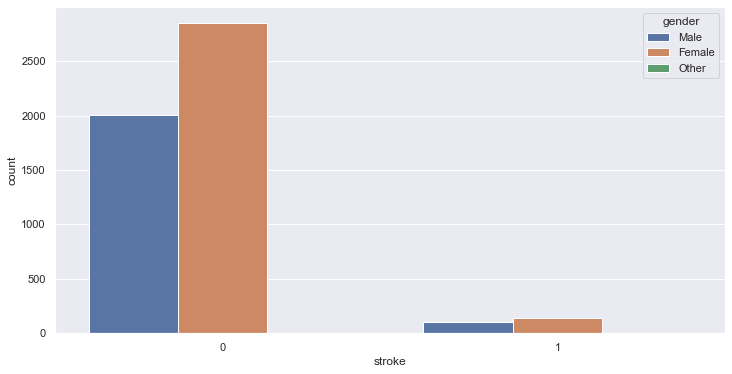

In [6]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(data=df1,x='stroke',hue='gender')

In [7]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Number of people having stroke according to the residence type

In [8]:
rural_stroke_count=df[(df['Residence_type']=='Rural') & (df['stroke']==1)]
print(len(rural_stroke_count))

114


In [9]:
Urban_stroke_count=df[(df['Residence_type']=='Urban') & (df['stroke']==1)]
print(len(Urban_stroke_count))

135


In [10]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [11]:
p=df[(df['smoking_status']!='never smoked')&(df['stroke']==1)]

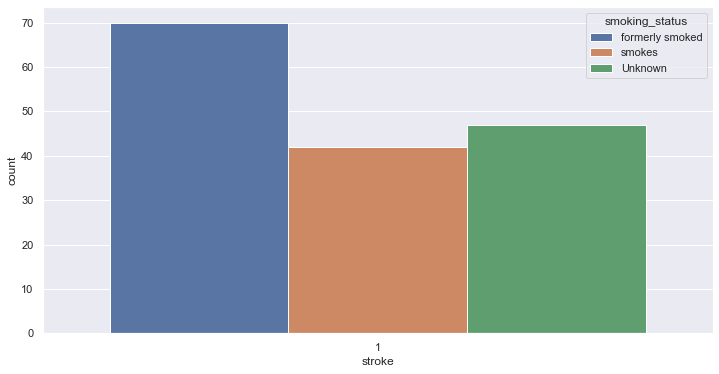

In [12]:
sns.countplot(data=p,x='stroke',hue='smoking_status')

Age distribution of people with stroke

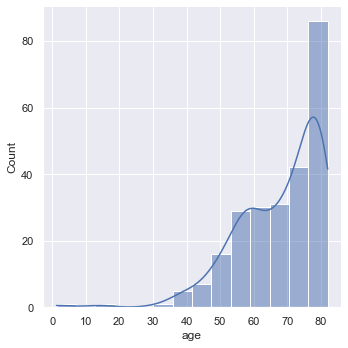

In [13]:
q=df[df['stroke']==1]
sns.displot(data=q, x="age", kde=True)

Overall age distribution

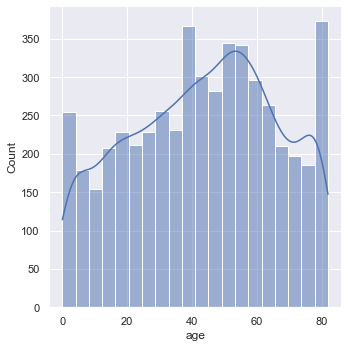

In [14]:
sns.displot(data=df, x="age", kde=True)

In [15]:
df1['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

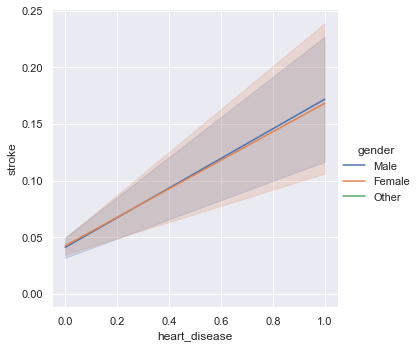

In [16]:
sns.relplot(
    data=df1, kind="line",
    x="heart_disease", y="stroke",
    hue="gender"
)


In [17]:
m=df[df1['stroke']==1]
n=df[df1['stroke']!=1]

In [18]:
m['bmi'].isnull().sum()

40

In [19]:
n['bmi'].mean()

28.823063829787245

In [20]:
stroke=df['stroke']

In [21]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [22]:
meanbmi=df['bmi'].mean()

In [23]:
df['bmi'].fillna(meanbmi,inplace=True)

In [24]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

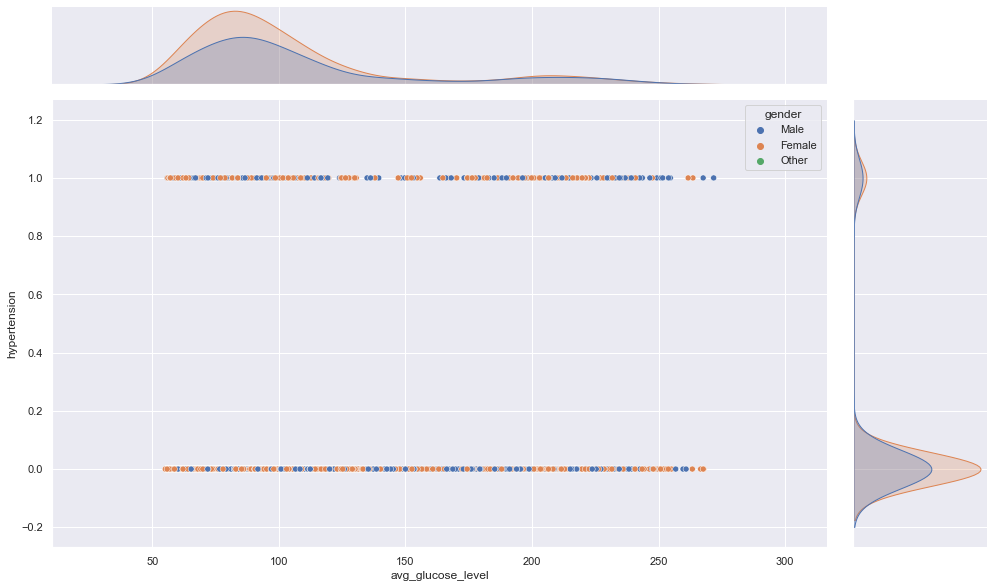

In [25]:
g=sns.jointplot(data=df1, x="avg_glucose_level", y="hypertension", hue="gender")
g.fig.set_figwidth(15.27)
g.fig.set_figheight(8.7)

Introducing ML

In [26]:
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()

In [27]:
df['gender']=labelencoder.fit_transform(df['gender'])
df.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,0,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1


In [28]:
df['smoking_status'].nunique()

4

In [29]:
df['smoking_status']=labelencoder.fit_transform(df['smoking_status'])
df.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,Yes,Private,Urban,228.69,36.600000,1,1
1,51676,0,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,2,1


In [30]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [31]:
df['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [32]:
df['Residence_type'].nunique()

2

In [33]:
df['Residence_type']=labelencoder.fit_transform(df['Residence_type'])
df.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,Yes,Private,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,Yes,Self-employed,0,202.21,28.893237,2,1


In [34]:
df.drop(['ever_married','work_type','bmi','id'],axis=1,inplace=True)
df.head()

,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,smoking_status,stroke
0,1,67.0,0,1,1,228.69,1,1
1,0,61.0,0,0,0,202.21,2,1
2,1,80.0,0,1,0,105.92,2,1
3,0,49.0,0,0,1,171.23,3,1
4,0,79.0,1,0,0,174.12,2,1


defining x and y

In [35]:
x=df.drop(['stroke'],axis=1)
x.head(2)

,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,smoking_status
0,1,67.0,0,1,1,228.69,1
1,0,61.0,0,0,0,202.21,2


In [36]:
y=df['stroke']
y.head(2)

0    1
1    1
Name: stroke, dtype: int64

train test split..splitting the whole dataset for training and testing 

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

introducing algo and fit the train data into it

In [38]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()

In [39]:
logmodel.fit(x_train,y_train)

LogisticRegression()

In [40]:
logmodel.predict_proba([[1,67,0,1,1,230,1]])

array([[0.8113812, 0.1886188]])

In [41]:
logmodel.score(x,y)

0.95146771037182

validating the algo's accuracy and stability with other algos

In [42]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'),x,y,cv=5)

array([0.95107632, 0.95107632, 0.95107632, 0.95107632, 0.95205479])

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
cross_val_score(SVC(gamma='auto'),x,y,cv=5)

array([0.95009785, 0.95107632, 0.95107632, 0.95107632, 0.95107632])

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
cross_val_score(RandomForestClassifier(n_estimators=40),x,y,cv=5)

array([0.94618395, 0.94618395, 0.94129159, 0.95009785, 0.94324853])